Objectives 1. Determine which are the busiest days in a week and throught out the year.
           2. Determine which Food category do people pefer to buy?
           3. Find any trends or patterns in the dataset which give insights on customer buying prefence of an item.

Importing libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the file

In [178]:
df = pd.read_csv("E:/Groceries_dataset.csv",parse_dates = ['date'])


Initial data exploration

In [167]:
df.head()

,date,dayOfWeek,no_of_customers,dairy,rice,wheat,fruits and vegtable,recipe mix,frozen,dry fruits,tea coffee,speices,oil,dates,snacks,chicken,beef,goat,seafood
0,01-Jan,SAT,12,5,1,2,2,8,NaN,5,5,NaN,0,2.0,7,22.0,24,25.0,1
1,02-Jan,SUN,0,1,4,0,3,4,3.0,6,0,1.0,5,5.0,6,NaN,20,29.0,5
2,03-Jan,MON,4,9,4,1,5,2,3.0,6,2,7.0,2,6.0,1,22.0,21,23.0,3
3,04-Jan,TUE,9,2,6,1,2,8,5.0,7,4,9.0,0,7.0,5,21.0,17,NaN,1
4,05-Jan,WED,10,4,0,1,6,7,4.0,5,5,1.0,5,NaN,3,22.0,23,29.0,5


In [66]:
df.shape

(367, 19)

In [67]:
df.columns

Index(['date', 'dayOfWeek', 'no_of_customers', 'dairy', 'rice', 'wheat',
       'fruits and vegtable', 'recipe mix', 'frozen', 'dry fruits',
       'tea coffee', 'speices', 'oil', 'dates', 'snacks', 'chicken', 'beef',
       'goat', 'seafood'],
      dtype='object')

In [68]:
df.head()

,date,dayOfWeek,no_of_customers,dairy,rice,wheat,fruits and vegtable,recipe mix,frozen,dry fruits,tea coffee,speices,oil,dates,snacks,chicken,beef,goat,seafood
0,01-Jan,SAT,12,5,1,2,2,8,NaN,5,5,NaN,0,2.0,7,22.0,24,25.0,1
1,02-Jan,SUN,0,1,4,0,3,4,3.0,6,0,1.0,5,5.0,6,NaN,20,29.0,5
2,03-Jan,MON,4,9,4,1,5,2,3.0,6,2,7.0,2,6.0,1,22.0,21,23.0,3
3,04-Jan,TUE,9,2,6,1,2,8,5.0,7,4,9.0,0,7.0,5,21.0,17,NaN,1
4,05-Jan,WED,10,4,0,1,6,7,4.0,5,5,1.0,5,NaN,3,22.0,23,29.0,5


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 367 non-null    object 
 1   dayOfWeek            367 non-null    object 
 2   no_of_customers      367 non-null    int64  
 3   dairy                367 non-null    int64  
 4   rice                 367 non-null    int64  
 5   wheat                367 non-null    int64  
 6   fruits and vegtable  367 non-null    int64  
 7   recipe mix           367 non-null    int64  
 8   frozen               365 non-null    float64
 9   dry fruits           367 non-null    int64  
 10  tea coffee           367 non-null    int64  
 11  speices              365 non-null    float64
 12  oil                  367 non-null    int64  
 13  dates                365 non-null    float64
 14  snacks               367 non-null    int64  
 15  chicken              365 non-null    flo

In [70]:
df.describe()

,no_of_customers,dairy,rice,wheat,fruits and vegtable,recipe mix,frozen,dry fruits,tea coffee,speices,oil,dates,snacks,chicken,beef,goat,seafood
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,365.000000,367.000000,367.000000,365.000000,367.000000,365.000000,367.000000,365.000000,367.000000,366.000000,367.000000
mean,9.730245,5.051771,4.111717,0.975477,3.049046,5.043597,4.405479,3.613079,2.468665,4.605479,2.724796,4.257534,3.820163,22.827397,20.269755,22.524590,4.776567
std,6.761005,3.297630,2.941330,0.837605,1.973262,1.992680,1.116791,2.248896,1.652444,2.842567,1.681793,5.405479,2.673555,2.875687,4.103941,5.313018,3.189668
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,15.000000,15.000000,0.000000
25%,5.000000,2.000000,2.000000,0.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,21.000000,17.000000,18.000000,2.000000
50%,9.000000,5.000000,4.000000,1.000000,3.000000,5.000000,4.000000,4.000000,2.000000,5.000000,3.000000,4.000000,4.000000,23.000000,20.000000,22.000000,5.000000
75%,13.000000,8.000000,6.000000,2.000000,5.000000,7.000000,5.000000,6.000000,4.000000,7.000000,4.000000,6.000000,6.000000,24.000000,23.000000,26.000000,7.000000
max,66.000000,11.000000,30.000000,2.000000,6.000000,8.000000,6.000000,7.000000,5.000000,9.000000,5.000000,100.000000,8.000000,60.000000,65.000000,61.000000,10.000000


considering date as the primary key. Treating duplicates by top to down approach.

In [81]:
df.duplicated(subset = 'date',keep ='first')

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Length: 365, dtype: bool

In [72]:
df.drop_duplicates(inplace = True)

Deleting duplicates

In [73]:
df.head()

,date,dayOfWeek,no_of_customers,dairy,rice,wheat,fruits and vegtable,recipe mix,frozen,dry fruits,tea coffee,speices,oil,dates,snacks,chicken,beef,goat,seafood
0,01-Jan,SAT,12,5,1,2,2,8,NaN,5,5,NaN,0,2.0,7,22.0,24,25.0,1
1,02-Jan,SUN,0,1,4,0,3,4,3.0,6,0,1.0,5,5.0,6,NaN,20,29.0,5
2,03-Jan,MON,4,9,4,1,5,2,3.0,6,2,7.0,2,6.0,1,22.0,21,23.0,3
3,04-Jan,TUE,9,2,6,1,2,8,5.0,7,4,9.0,0,7.0,5,21.0,17,NaN,1
4,05-Jan,WED,10,4,0,1,6,7,4.0,5,5,1.0,5,NaN,3,22.0,23,29.0,5


In [74]:
df.shape

(366, 19)

In [78]:
df.duplicated(subset = 'date')

0      False
1      False
2      False
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
366     True
Length: 366, dtype: bool

In [80]:
df.drop_duplicates(subset = 'date',keep = 'first',inplace = True)

Checking for duplicates

In [77]:
df.head()

,date,dayOfWeek,no_of_customers,dairy,rice,wheat,fruits and vegtable,recipe mix,frozen,dry fruits,tea coffee,speices,oil,dates,snacks,chicken,beef,goat,seafood
0,01-Jan,SAT,12,5,1,2,2,8,NaN,5,5,NaN,0,2.0,7,22.0,24,25.0,1
1,02-Jan,SUN,0,1,4,0,3,4,3.0,6,0,1.0,5,5.0,6,NaN,20,29.0,5
2,03-Jan,MON,4,9,4,1,5,2,3.0,6,2,7.0,2,6.0,1,22.0,21,23.0,3
3,04-Jan,TUE,9,2,6,1,2,8,5.0,7,4,9.0,0,7.0,5,21.0,17,NaN,1
4,05-Jan,WED,10,4,0,1,6,7,4.0,5,5,1.0,5,NaN,3,22.0,23,29.0,5


checking for Null values

In [82]:
df.isna().any()

date                   False
dayOfWeek              False
no_of_customers        False
dairy                  False
rice                   False
wheat                  False
fruits and vegtable    False
recipe mix             False
frozen                  True
dry fruits             False
tea coffee             False
speices                 True
oil                    False
dates                   True
snacks                 False
chicken                 True
beef                   False
goat                    True
seafood                False
dtype: bool

Null Values in Frozen,dates,chicken,goat

In [85]:
df['frozen'].isnull().sum()

2

Using mean imputation to fill Nulls in frozen column

In [86]:
df['frozen'].fillna(df['frozen'].mean(),inplace = True)

In [87]:
df['frozen'].isnull().sum()

0

Find any trends or patterns in the dataset which give insights on customer buying prefence of an item.

In [88]:
df['dates'].mean()


4.258953168044077

In [89]:
df['dates'].isnull().sum()

2

In [90]:
df['dates'].std()

5.420357168055675

In [91]:
df['dates'].median()

4.0

In [92]:
df['dates'].max()

100.0

(array([362.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

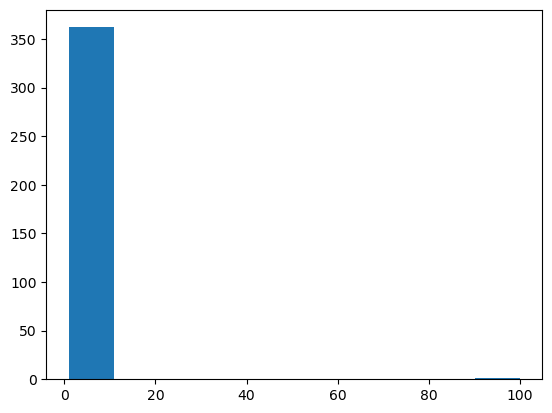

In [93]:
plt.hist(df['dates'])

Clearly shows outlier in dates. Customers prefer buying dates around the festive seasons.

<AxesSubplot:xlabel='dates'>

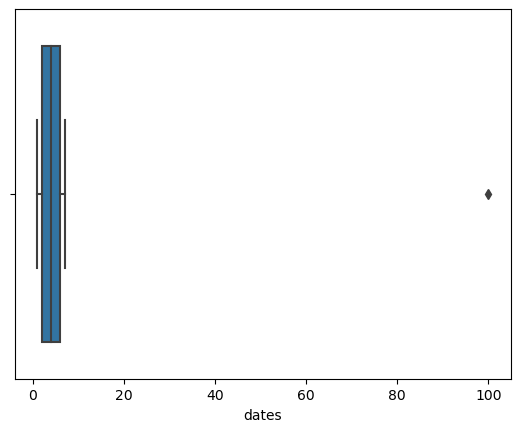

In [96]:
sns.boxplot(x = 'dates',data = df)

In [97]:
df['dates'].fillna(df['dates'].mean(),inplace = True)

In [99]:
df['dates'].isnull().sum()

0

In [100]:
df.isna().any()

date                   False
dayOfWeek              False
no_of_customers        False
dairy                  False
rice                   False
wheat                  False
fruits and vegtable    False
recipe mix             False
frozen                 False
dry fruits             False
tea coffee             False
speices                 True
oil                    False
dates                  False
snacks                 False
chicken                 True
beef                   False
goat                    True
seafood                False
dtype: bool

In [101]:
df['speices'].isnull().sum()

2

In [102]:
df['speices'].fillna(df['speices'].mean(),inplace = True)

In [103]:
df['speices'].isnull().sum()

0

In [104]:
df['chicken'].isnull().sum()

2

In [105]:
df['chicken'].fillna(df['chicken'].mean(),inplace = True)

In [106]:
df['chicken'].isnull().sum()

0

In [107]:
df['goat'].isnull().sum()

1

In [108]:
df['goat'].fillna(df['goat'].mean(),inplace = True)

In [109]:
df.isna().any()

date                   False
dayOfWeek              False
no_of_customers        False
dairy                  False
rice                   False
wheat                  False
fruits and vegtable    False
recipe mix             False
frozen                 False
dry fruits             False
tea coffee             False
speices                False
oil                    False
dates                  False
snacks                 False
chicken                False
beef                   False
goat                   False
seafood                False
dtype: bool

No Null values

Outliers Detection

In [110]:
df.describe()

,no_of_customers,dairy,rice,wheat,fruits and vegtable,recipe mix,frozen,dry fruits,tea coffee,speices,oil,dates,snacks,chicken,beef,goat,seafood
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,9.712329,5.063014,4.106849,0.980822,3.052055,5.032877,4.407713,3.627397,2.463014,4.597796,2.731507,4.258953,3.824658,22.842975,20.257534,22.513736,4.786301
std,6.773574,3.299830,2.940263,0.836768,1.977907,1.991469,1.113921,2.245463,1.654789,2.831960,1.680273,5.405446,2.670956,2.867998,4.107682,5.307814,3.187946
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,15.000000,15.000000,0.000000
25%,5.000000,2.000000,2.000000,0.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,21.000000,17.000000,18.000000,2.000000
50%,8.000000,5.000000,4.000000,1.000000,3.000000,5.000000,4.000000,4.000000,2.000000,5.000000,3.000000,4.000000,4.000000,23.000000,20.000000,22.000000,5.000000
75%,13.000000,8.000000,6.000000,2.000000,5.000000,7.000000,5.000000,6.000000,4.000000,7.000000,4.000000,6.000000,6.000000,24.000000,23.000000,26.000000,7.000000
max,66.000000,11.000000,30.000000,2.000000,6.000000,8.000000,6.000000,7.000000,5.000000,9.000000,5.000000,100.000000,8.000000,60.000000,65.000000,61.000000,10.000000


Outlier detection for no_of_customers, rice, dates,chicken,goat,beef


writing a function for outlier detection


In [114]:
    def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


outliers = find_outliers_IQR(df['no_of_customers'])

print("number of outliers:" + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers


number of outliers:7
max outlier value: 66
min outlier value: 27


92     30
95     28
99     27
100    50
121    66
181    30
357    35
Name: no_of_customers, dtype: int64

<AxesSubplot:xlabel='no_of_customers'>

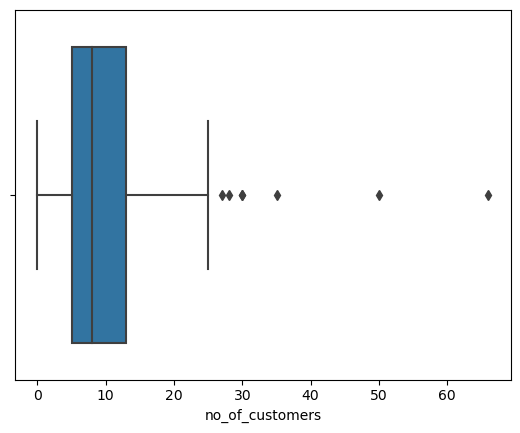

In [117]:
sns.boxplot(x = "no_of_customers",data = df)

In [116]:
outliers = find_outliers_IQR(df['rice'])

print("number of outliers:" + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers


number of outliers:1
max outlier value: 30
min outlier value: 30


181    30
Name: rice, dtype: int64

<AxesSubplot:xlabel='rice'>

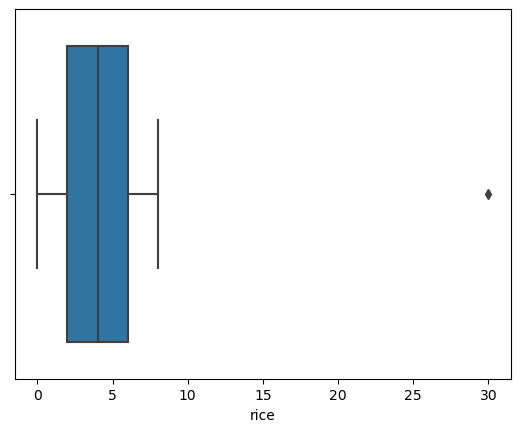

In [118]:
sns.boxplot(x = "rice",data = df)

In [119]:
outliers = find_outliers_IQR(df['dates'])

print("number of outliers:" + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers


number of outliers:1
max outlier value: 100.0
min outlier value: 100.0


100    100.0
Name: dates, dtype: float64

<AxesSubplot:xlabel='dates'>

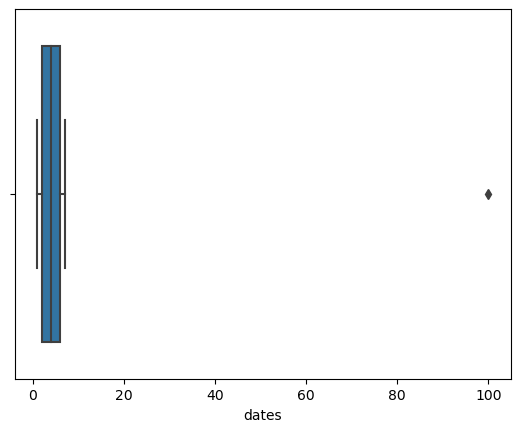

In [120]:
sns.boxplot(x = "dates",data = df)

In [122]:
outliers = find_outliers_IQR(df['chicken'])

print("number of outliers:" + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers:3
max outlier value: 60.0
min outlier value: 32.0


100    45.0
121    60.0
181    32.0
Name: chicken, dtype: float64

<AxesSubplot:xlabel='chicken'>

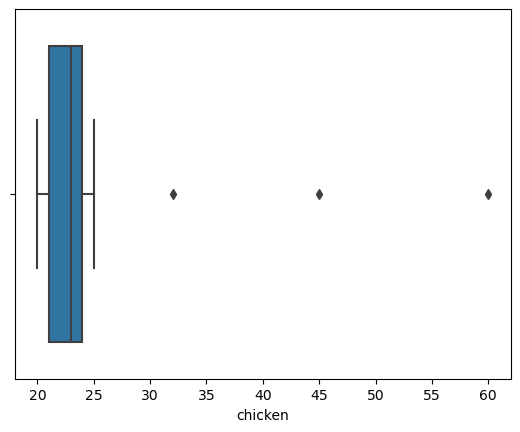

In [124]:
sns.boxplot(x = "chicken",data = df)

In [125]:
outliers = find_outliers_IQR(df['beef'])

print("number of outliers:" + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers:2
max outlier value: 65
min outlier value: 45


100    45
121    65
Name: beef, dtype: int64

<AxesSubplot:xlabel='beef'>

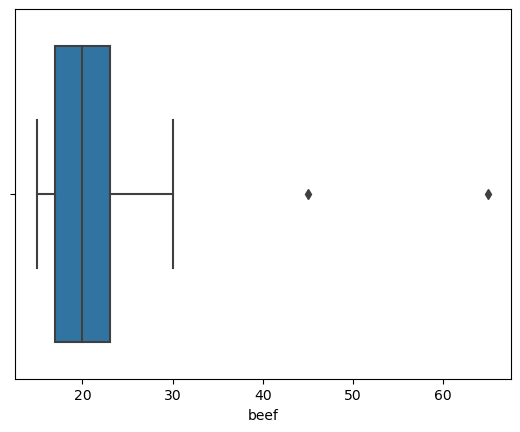

In [127]:
sns.boxplot(x = "beef",data = df)

In [128]:
outliers = find_outliers_IQR(df['goat'])

print("number of outliers:" + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers:2
max outlier value: 61.0
min outlier value: 50.0


100    50.0
121    61.0
Name: goat, dtype: float64

<AxesSubplot:xlabel='goat'>

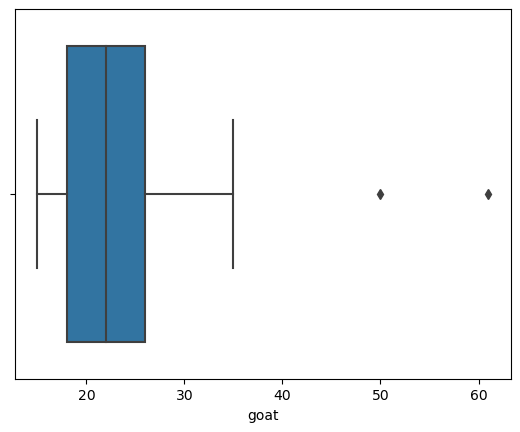

In [129]:
sns.boxplot(x = "goat",data = df)

clearly these columns have outliers. It shows on some days people visit the store and purshase more of these items. 

Finding the days which have these outliers

In [132]:
df[df['no_of_customers'].isin([30,28,27,50,66,30,35])]


,date,dayOfWeek,no_of_customers,dairy,rice,wheat,fruits and vegtable,recipe mix,frozen,dry fruits,tea coffee,speices,oil,dates,snacks,chicken,beef,goat,seafood
92,03-Apr,SUN,30,5,8,2,0,4,3.0,7,1,2.0,1,3.0,4,23.0,22,30.0,2
95,06-Apr,WED,28,7,7,0,1,8,5.0,1,2,4.0,4,5.0,0,24.0,23,19.0,2
99,10-Apr,SUN,27,7,0,0,3,7,3.0,1,0,8.0,3,3.0,2,23.0,19,22.0,2
100,11-Apr,MON,50,5,4,0,2,2,3.0,6,4,3.0,2,100.0,6,45.0,45,50.0,3
121,02-May,MON,66,8,5,2,5,2,6.0,2,1,4.0,2,3.0,7,60.0,65,61.0,7
181,01-Jul,FRI,30,11,30,2,3,4,3.0,2,3,5.0,2,5.0,1,32.0,30,35.0,7
357,24-Dec,SAT,35,5,2,0,3,8,3.0,0,3,9.0,3,4.0,6,20.0,20,29.0,6


These are the dates in which the store is visited more compared to rest of the days of the year. These dates fall on religious festivals, and right before public holidays .Thats when people tend to buy more.

In [142]:
df_groupby_day = df.groupby('dayOfWeek')['no_of_customers'].mean()

In [143]:
df_groupby_day

dayOfWeek
FRI    17.538462
MON     7.500000
SAT    13.339623
SUN     3.153846
THU    10.730769
TUE     7.692308
WED     7.961538
Name: no_of_customers, dtype: float64

<AxesSubplot:xlabel='dayOfWeek', ylabel='no_of_customers'>

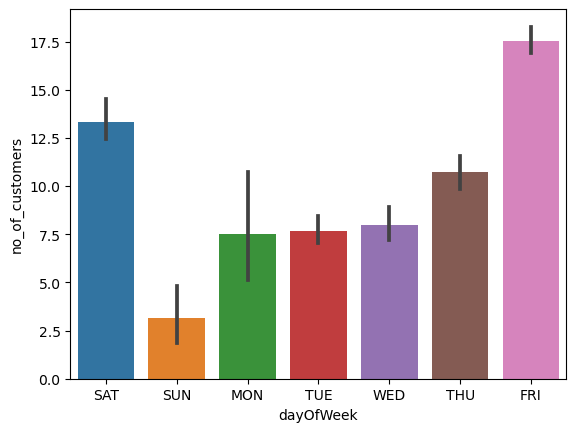

In [148]:
sns.barplot(x = 'dayOfWeek',y = 'no_of_customers',data = df)

Friday is when the store gets max no of people followed by saturday. Sunday gets the least no of people

In [150]:
df['dairy'].sum()

1848

In [151]:
df['chicken'].sum()

8337.685950413223

In [225]:
best_selling = df.groupby('dayOfWeek')['dairy','rice','dates','chicken','goat','beef','frozen','snacks','oil','seafood','speices','wheat'].mean()

C:\Users\16474\AppData\Local\Temp\ipykernel_6504\3181707154.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best_selling = df.groupby('dayOfWeek')['dairy','rice','dates','chicken','goat','beef','frozen','snacks','oil','seafood','speices','wheat'].mean()


In [226]:
best_selling

,dairy,rice,dates,chicken,goat,beef,frozen,snacks,oil,seafood,speices,wheat
dayOfWeek,,,,,,,,,,,,
FRI,4.980769,4.211538,4.173077,23.019231,22.807692,20.115385,4.423077,4.403846,3.057692,4.846154,5.000000,0.692308
MON,5.384615,4.057692,5.788462,23.960784,23.980769,20.846154,4.365385,3.576923,2.730769,5.019231,4.653846,0.980769
SAT,5.259259,3.611111,3.574074,22.259259,23.370370,19.574074,4.018868,4.481481,2.740741,4.574074,5.018868,1.000000
SUN,4.903846,4.461538,4.057692,22.647059,21.923077,20.423077,4.557692,4.153846,2.884615,4.788462,4.326923,1.134615
THU,5.641509,4.773585,4.019231,22.113208,22.283019,20.245283,4.698113,3.075472,2.226415,4.301887,4.716981,0.962264
TUE,4.442308,3.711538,4.230769,22.711538,21.784314,20.596154,4.352941,3.750000,2.461538,4.692308,3.711538,1.115385
WED,4.730769,3.961538,3.980392,23.134615,21.480769,20.115385,4.423077,3.288462,2.980769,5.230769,4.807692,0.942308


### For this supermarket people come to buy meat more compared to other categories of food. 

In [170]:
type(df['date'][0])

str

In [179]:
df['date']

0      01-Jan
1      02-Jan
2      03-Jan
3      04-Jan
4      05-Jan
        ...  
362    29-Dec
363    30-Dec
364    31-Dec
365    22-Dec
366    24-Dec
Name: date, Length: 367, dtype: object

In [180]:
from datetime import datetime



In [184]:

df['date'] = df['date'].apply(lambda x : datetime.strptime(x, '%d-%b').strftime('%d/%m'))


In [201]:
df['month'] = df['date'].apply(lambda x : datetime.strptime(x, '%d/%m').strftime('%m'))


In [202]:
df['month']

0      01
1      01
2      01
3      01
4      01
       ..
362    12
363    12
364    12
365    12
366    12
Name: month, Length: 367, dtype: object

In [203]:
df_pattern = df.groupby('month').sum()['no_of_customers'].reset_index()

In [204]:
df_pattern

,month,no_of_customers
0,01,267
1,02,268
2,03,261
3,04,458
4,05,335
5,06,270
6,07,302
7,08,268
8,09,259
9,10,279


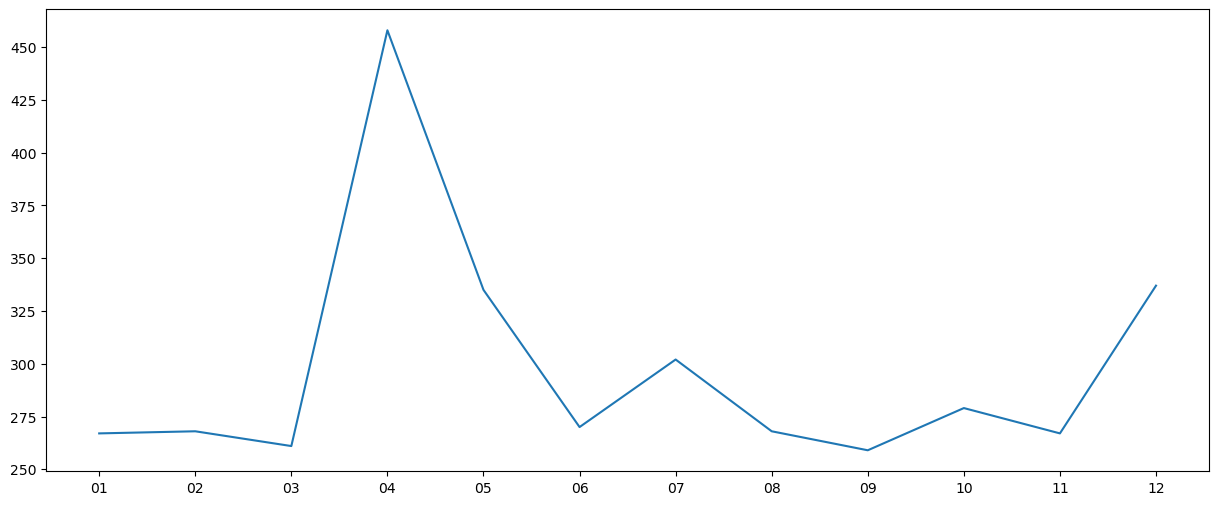

In [205]:
plt.figure(figsize=(15,6))
plt.plot(df_pattern['month'],df_pattern['no_of_customers'])


In [199]:
df[df['no_of_customers'] == df['no_of_customers'].max()]

,date,dayOfWeek,no_of_customers,dairy,rice,wheat,fruits and vegtable,recipe mix,frozen,dry fruits,tea coffee,speices,oil,dates,snacks,chicken,beef,goat,seafood
121,02/05,MON,66,8,5,2,5,2,6.0,2,1,4.0,2,3.0,7,60.0,65,61.0,7


In [ ]:
sns.barplot(x = 'sex',y = 'total_bill',data = tips)

In [234]:
pivot_df = pd.pivot_table(df,values = ['goat','chicken','beef','rice','dairy'],index = ['dayOfWeek'],
               aggfunc='mean').reset_index()

In [235]:
pivot_df

,dayOfWeek,beef,chicken,dairy,goat,rice
0,FRI,20.115385,23.019231,4.980769,22.807692,4.211538
1,MON,20.846154,23.960784,5.384615,23.980769,4.057692
2,SAT,19.574074,22.259259,5.259259,23.370370,3.611111
3,SUN,20.423077,22.647059,4.903846,21.923077,4.461538
4,THU,20.245283,22.113208,5.641509,22.283019,4.773585
5,TUE,20.596154,22.711538,4.442308,21.784314,3.711538
6,WED,20.115385,23.134615,4.730769,21.480769,3.961538
